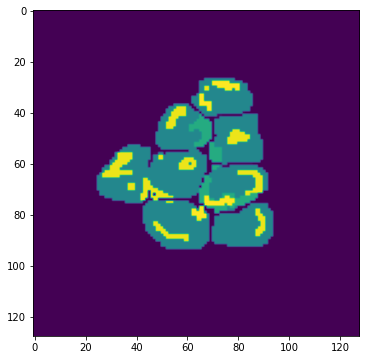

In [144]:
from skimage.io import imread, imsave
from tnia.plotting.plt_helper import imshow2d
from skimage.morphology import remove_small_holes


input_name = "D:\\images\\tnia-python-images\\notebooks\\segmentation\\blob\\truth2.tif"
measure_name = "D:\\images\\tnia-python-images\\notebooks\\segmentation\\blob\\measure.tif"
#input_name = "D:\\images\\tnia-python-images\\notebooks\\deconvolution\\wheel\\wheel.tif"

truth = imread(input_name)

fig=imshow2d(star)
truth=star.astype('float32')

(128, 128)


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\psfs.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  psf = fftshift(ifftn(ifftshift(otf)).astype(np.float32))


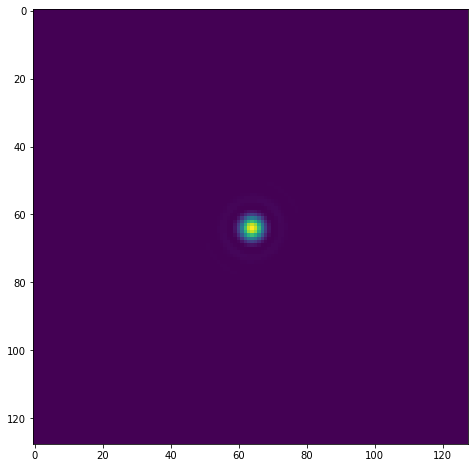

In [84]:
from tnia.deconvolution.psfs import paraxial_psf

n=img.shape[0]
wavelength = 500
na=1.4
pixel_size = 35

psf=paraxial_psf(n, wavelength, na, pixel_size)

print(psf.shape)
fig=imshow2d(psf,8,8)

In [72]:
from tnia.deconvolution.forward import forward

uint8 float32 float32
248 351.0


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  return poisson(field_imaged.astype(float))


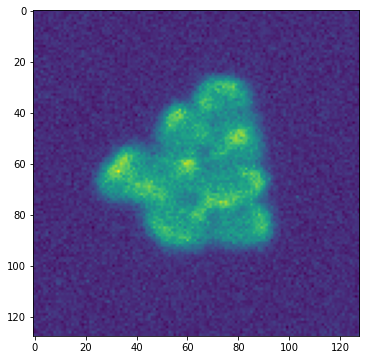

In [85]:
from tnia.nd.ndutil import centercrop2d
img = forward(truth, psf,200.,100., True).astype('float32')

fig = imshow2d(img)
print(star.dtype, img.dtype, psf.dtype)
print(star.max(), img.max())

In [74]:
imsave(measure_name, img)

162.82617


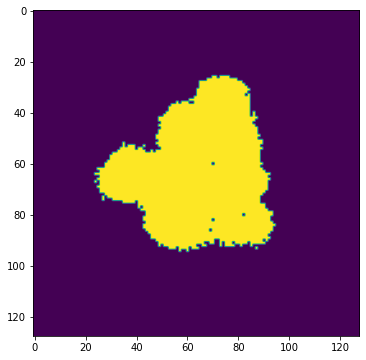

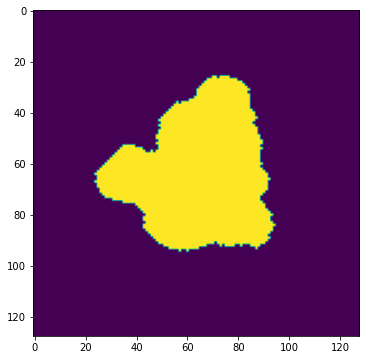

In [64]:
from skimage.filters import threshold_otsu
t=threshold_otsu(img)
print(t)
thresholded=img>t
fig = imshow2d(thresholded)
from skimage.morphology import opening, closing
binary=thresholded
binary=closing(thresholded, disk(1))
binary=opening(binary, disk(2))
fig = imshow2d(binary)

339.0 279.05145
(11, 2)


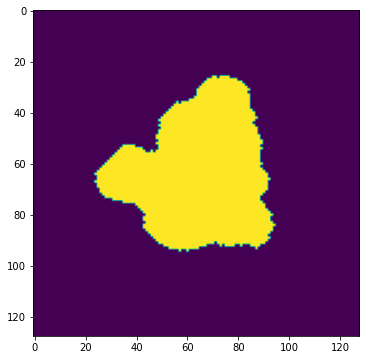

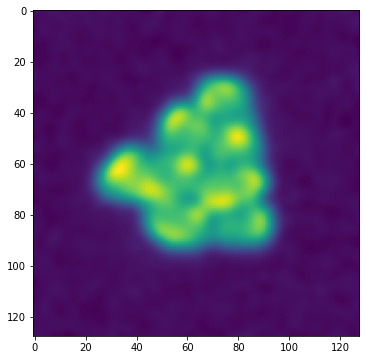

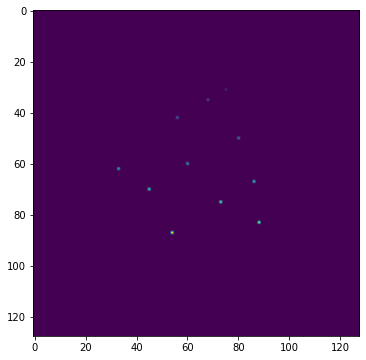

In [67]:
import numpy as np
from PIL import Image
from scipy import ndimage as ndi
from skimage.color import gray2rgb
from skimage.feature import peak_local_max
from skimage.measure import label
from skimage.morphology import closing, disk, erosion
from skimage.segmentation import find_boundaries, watershed
from skimage.filters import gaussian, threshold_otsu
from tnia.viewing.napari_helper import show_image_and_label as sil
from skimage.morphology import remove_small_holes
from tnia.morphology.fill_holes import fill_holes_3d_slicer
from tnia.segmentation.separate import separate_touching2, separate_touching
from skimage.filters import gaussian
from skimage.feature import peak_local_max
from tnia.plotting.plt_helper import imshow2d

#labels,distance,b1,b2 = separate_touching2(filtered, opened, 5, [10,10,10],[.5,.5,.5])

im=img
segmented=binary
min_distance=5
spot_sigma=[2,2]
distance_sigma=[.5,.5]

fig=imshow2d(segmented)

blurred_spot = gaussian(im, spot_sigma)

fig=imshow2d(blurred_spot)

print(im.max(), blurred_spot.max())
# calculate peaks from blurred image
coords = peak_local_max(blurred_spot, min_distance, exclude_border=False,threshold_abs=t)


print(coords.shape)
mask = np.zeros(im.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

fig=imshow2d(markers)

In [147]:
import pyclesperanto_prototype as cle
labels = cle.voronoi_otsu_labeling(img, spot_sigma=5, outline_sigma=1)

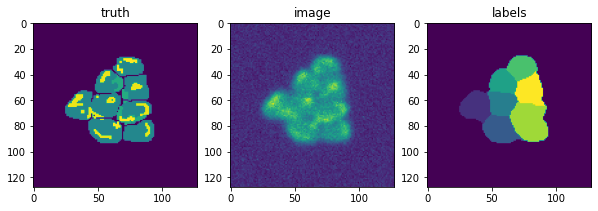

In [148]:
from tnia.plotting.plt_helper import imshow_multi2d
fig = imshow_multi2d([truth, img, labels],['truth', 'image', 'labels'],1,3)

In [142]:
labels=[]
titles=[]
for i in range(3,8):
    for j in range(1,6):
        title='s '+str(i)+' o '+str(j)
        print(title)
        labels.append(cle.voronoi_otsu_labeling(img, spot_sigma=i, outline_sigma=j))
        titles.append(title)

s 3 o 1
s 3 o 2
s 3 o 3
s 3 o 4
s 3 o 5
s 4 o 1
s 4 o 2
s 4 o 3
s 4 o 4
s 4 o 5
s 5 o 1
s 5 o 2
s 5 o 3
s 5 o 4
s 5 o 5
s 6 o 1
s 6 o 2
s 6 o 3
s 6 o 4
s 6 o 5
s 7 o 1
s 7 o 2
s 7 o 3
s 7 o 4
s 7 o 5


In [140]:
labels[0].shape

(128, 128)

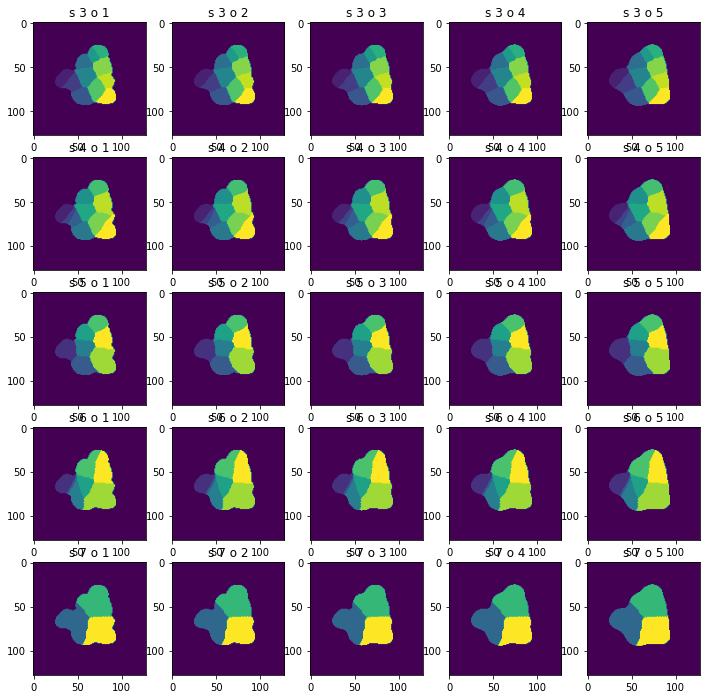

In [143]:
fig = imshow_multi2d(labels,titles,5,5,12,12)

In [122]:
type(fig)

numpy.ndarray

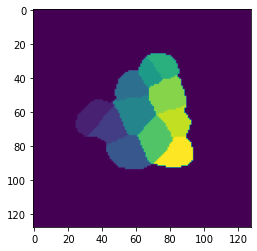

In [109]:
import matplotlib.pyplot as plt
plt.imshow(labels[0])

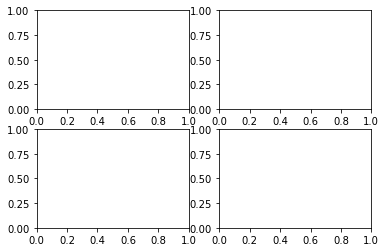

In [127]:
a,b=plt.subplots(2,2)

In [124]:
type(a), type(b)

(matplotlib.figure.Figure, numpy.ndarray)

In [125]:
for ax in b:
    print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


In [126]:
b

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [129]:
test=np.ndarray.flatten(b)

In [130]:
len(test)

4

In [133]:
from numpy import ndarray

In [134]:
from numpy.ndarray import flatten

ModuleNotFoundError: No module named 'numpy.ndarray'

In [135]:
import numpy.ndarray as npnd

ModuleNotFoundError: No module named 'numpy.ndarray'